In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.regression.linear_model import OLS
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [2]:
df = pd.read_csv('avg-household-size.csv')

In [3]:
df2 = pd.read_csv('cancer_reg.csv')

In [4]:
df.head()

,statefips,countyfips,avghouseholdsize,geography
0,2,13,2.43,"Aleutians East Borough, Alaska"
1,2,16,3.59,"Aleutians West Census Area, Alaska"
2,2,20,2.77,"Anchorage Municipality, Alaska"
3,2,50,3.86,"Bethel Census Area, Alaska"
4,2,60,2.50,"Bristol Bay Borough, Alaska"


In [5]:
df.tail()

,statefips,countyfips,avghouseholdsize,geography
3215,56,37,2.64,"Sweetwater County, Wyoming"
3216,56,39,2.63,"Teton County, Wyoming"
3217,56,41,2.76,"Uinta County, Wyoming"
3218,56,43,2.34,"Washakie County, Wyoming"
3219,56,45,2.27,"Weston County, Wyoming"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   statefips         3220 non-null   int64  
 1   countyfips        3220 non-null   int64  
 2   avghouseholdsize  3220 non-null   float64
 3   geography         3220 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 100.8+ KB


In [7]:
df2.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [8]:
df2.tail()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,...,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,...,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,...,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938
3046,1962.667684,48,213.6,453.549422,41193,37030,13.9,0.000000,"(40362.7, 42724.4]",26.2,...,60.3,22.9,25.1,12.6,70.098132,16.590100,3.177753,1.356457,56.040242,8.981723


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  geography                3047 non-null   object 
 13  percentmarried           3047 non-null   float64
 14  pctnohs18_24            

In [10]:
df.isnull().sum()

statefips           0
countyfips          0
avghouseholdsize    0
geography           0
dtype: int64

In [11]:
df2.isnull().sum()

avganncount                   0
avgdeathsperyear              0
target_deathrate              0
incidencerate                 0
medincome                     0
popest2015                    0
povertypercent                0
studypercap                   0
binnedinc                     0
medianage                     0
medianagemale                 0
medianagefemale               0
geography                     0
percentmarried                0
pctnohs18_24                  0
pcths18_24                    0
pctsomecol18_24            2285
pctbachdeg18_24               0
pcths25_over                  0
pctbachdeg25_over             0
pctemployed16_over          152
pctunemployed16_over          0
pctprivatecoverage            0
pctprivatecoveragealone     609
pctempprivcoverage            0
pctpubliccoverage             0
pctpubliccoveragealone        0
pctwhite                      0
pctblack                      0
pctasian                      0
pctotherrace                  0
pctmarri

In [12]:
df2.describe()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


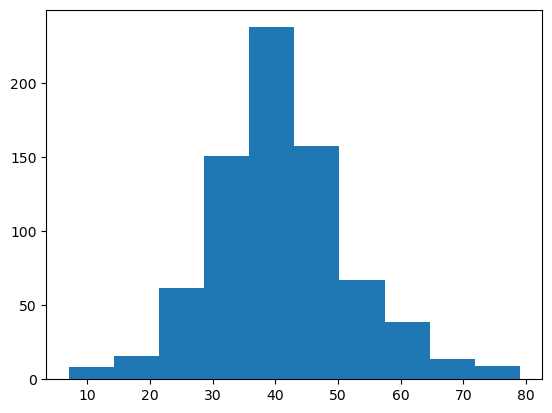

In [13]:
plt.hist(df2['pctsomecol18_24'])
plt.show()

In [14]:
df2['pctsomecol18_24'].describe()

count    762.000000
mean      40.977034
std       11.115805
min        7.100000
25%       34.000000
50%       40.400000
75%       46.400000
max       79.000000
Name: pctsomecol18_24, dtype: float64

In [15]:
df2['pctsomecol18_24'] = df2['pctsomecol18_24'].fillna(40.98)

In [16]:
df2['pctsomecol18_24'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3047 entries, 0 to 3046
Series name: pctsomecol18_24
Non-Null Count  Dtype  
--------------  -----  
3047 non-null   float64
dtypes: float64(1)
memory usage: 23.9 KB


In [17]:
df2.isnull().sum()

avganncount                  0
avgdeathsperyear             0
target_deathrate             0
incidencerate                0
medincome                    0
popest2015                   0
povertypercent               0
studypercap                  0
binnedinc                    0
medianage                    0
medianagemale                0
medianagefemale              0
geography                    0
percentmarried               0
pctnohs18_24                 0
pcths18_24                   0
pctsomecol18_24              0
pctbachdeg18_24              0
pcths25_over                 0
pctbachdeg25_over            0
pctemployed16_over         152
pctunemployed16_over         0
pctprivatecoverage           0
pctprivatecoveragealone    609
pctempprivcoverage           0
pctpubliccoverage            0
pctpubliccoveragealone       0
pctwhite                     0
pctblack                     0
pctasian                     0
pctotherrace                 0
pctmarriedhouseholds         0
birthrat

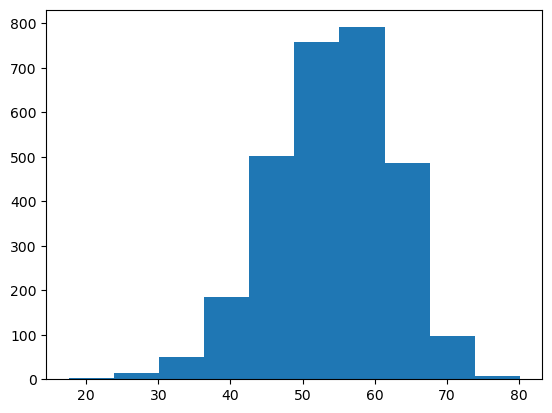

In [18]:
plt.hist(df2['pctemployed16_over'])
plt.show()

In [19]:
df2['pctemployed16_over'].median()

54.5

In [20]:
df2['pctemployed16_over'] = df2['pctemployed16_over'].fillna(54.5)

In [21]:
df2.isnull().sum()

avganncount                  0
avgdeathsperyear             0
target_deathrate             0
incidencerate                0
medincome                    0
popest2015                   0
povertypercent               0
studypercap                  0
binnedinc                    0
medianage                    0
medianagemale                0
medianagefemale              0
geography                    0
percentmarried               0
pctnohs18_24                 0
pcths18_24                   0
pctsomecol18_24              0
pctbachdeg18_24              0
pcths25_over                 0
pctbachdeg25_over            0
pctemployed16_over           0
pctunemployed16_over         0
pctprivatecoverage           0
pctprivatecoveragealone    609
pctempprivcoverage           0
pctpubliccoverage            0
pctpubliccoveragealone       0
pctwhite                     0
pctblack                     0
pctasian                     0
pctotherrace                 0
pctmarriedhouseholds         0
birthrat

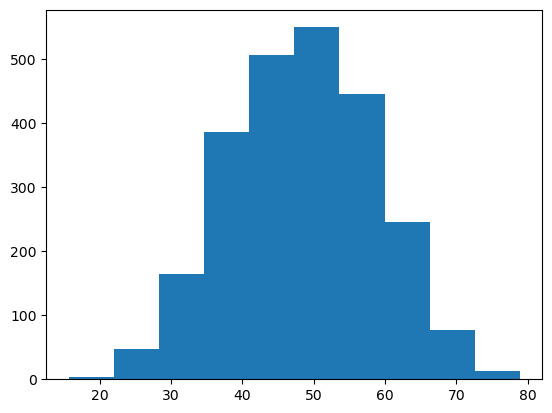

In [22]:
plt.hist(df2['pctprivatecoveragealone'])
plt.show()

In [23]:
df2['pctprivatecoveragealone'].describe()

count    2438.000000
mean       48.453774
std        10.083006
min        15.700000
25%        41.000000
50%        48.700000
75%        55.600000
max        78.900000
Name: pctprivatecoveragealone, dtype: float64

In [24]:
df2['pctprivatecoveragealone'] = df2['pctprivatecoveragealone'].fillna(48.45)

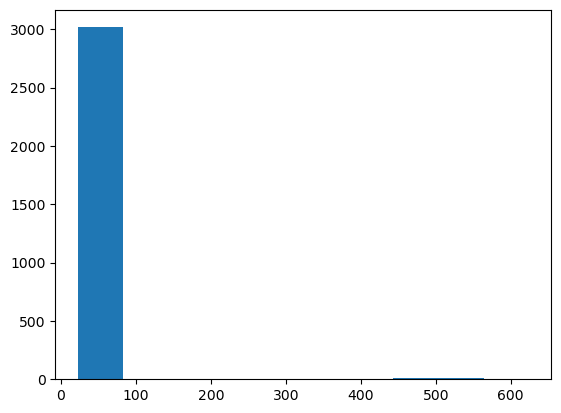

In [25]:
plt.hist(df2['medianage'])
plt.show()

In [26]:
df2[df2['medianage'] == 624]

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
318,186.0,93,193.4,406.2,37122,25345,19.0,0.0,"(34218.1, 37413.8]",624.0,...,34.2,29.4,53.2,23.4,96.145821,0.62596,0.519665,0.141727,48.108966,4.012841


In [27]:
df2['medianage'] = df2['medianage'].replace(624, 45.27)

In [28]:
df2[df2['medianage'] > 60]

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
100,89.000000,32,152.3,447.200000,61802,17110,8.2,0.000000,"(61494.5, 125635]",458.4,...,67.60,55.0,24.3,9.0,96.476056,0.352983,0.482410,1.194258,60.491493,9.675646
181,564.000000,188,135.7,395.400000,56142,139394,12.6,0.000000,"(54545.6, 61494.5]",469.2,...,48.45,43.1,35.9,21.1,69.971750,2.662510,1.383949,9.734481,51.876656,5.497053
225,346.000000,156,176.8,399.000000,44207,62194,14.6,0.000000,"(42724.4, 45201]",546.0,...,48.45,42.6,36.2,18.6,74.844730,21.417651,0.342389,1.576584,51.591360,4.194566
425,230.000000,98,198.1,477.800000,45841,39259,18.7,0.000000,"(45201, 48021.6]",508.8,...,45.40,37.9,39.3,22.3,68.766237,27.377617,0.430442,1.533289,45.407268,6.140351
606,35.000000,12,188.8,538.800000,36449,4251,17.3,0.000000,"(34218.1, 37413.8]",619.2,...,24.70,20.2,53.8,27.1,98.442662,0.070788,0.165172,0.141576,46.769034,3.333333
637,140.000000,59,193.1,478.000000,66522,25512,6.9,0.000000,"(61494.5, 125635]",498.0,...,65.60,55.4,24.4,9.3,96.813880,0.954259,0.563880,0.339117,61.336613,7.938903
843,599.000000,250,207.1,489.900000,39927,128755,22.5,62.133509,"(37413.8, 40362.7]",412.8,...,41.40,36.4,38.7,23.6,67.091150,29.715665,0.765822,0.362590,45.456544,3.432793
991,85.000000,32,156.5,404.000000,61762,19162,9.6,0.000000,"(61494.5, 125635]",481.2,...,48.45,50.3,26.1,13.8,88.446510,6.584645,1.240891,1.019115,58.641541,3.450672
1199,959.000000,398,206.7,497.400000,41010,201410,18.8,24.824984,"(40362.7, 42724.4]",424.8,...,42.20,32.6,35.9,20.2,69.410704,23.273279,3.041250,1.080156,41.830737,5.131499
1312,1962.667684,4,148.6,453.549422,53739,1670,10.9,0.000000,"(51046.4, 54545.6]",535.2,...,56.70,48.6,29.2,11.2,98.327360,0.358423,0.000000,0.000000,47.826087,10.029499


In [29]:
df2['medianage'] = df2['medianage'].replace([458.4, 469.2, 546, 508.8, 619.2, 498, 412.8, 481.2, 424.8, 535.2, 406.8, 579.6, 502.8, 496.8, 525.6, 519.6, 536.4, 523.2, 470.4, 430.8, 414, 500.4, 429.6, 501.6, 496.8, 349.2, 511.2, 498, 508.8], 45.27)

In [30]:
df2.describe()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,40.867640,39.570725,...,48.453019,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,5.189884,5.226017,...,9.018885,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,43.100000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.450000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,53.800000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,65.300000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


In [31]:
df2.isnull().sum()

avganncount                0
avgdeathsperyear           0
target_deathrate           0
incidencerate              0
medincome                  0
popest2015                 0
povertypercent             0
studypercap                0
binnedinc                  0
medianage                  0
medianagemale              0
medianagefemale            0
geography                  0
percentmarried             0
pctnohs18_24               0
pcths18_24                 0
pctsomecol18_24            0
pctbachdeg18_24            0
pcths25_over               0
pctbachdeg25_over          0
pctemployed16_over         0
pctunemployed16_over       0
pctprivatecoverage         0
pctprivatecoveragealone    0
pctempprivcoverage         0
pctpubliccoverage          0
pctpubliccoveragealone     0
pctwhite                   0
pctblack                   0
pctasian                   0
pctotherrace               0
pctmarriedhouseholds       0
birthrate                  0
dtype: int64

In [32]:
df.isnull().sum()

statefips           0
countyfips          0
avghouseholdsize    0
geography           0
dtype: int64

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  geography                3047 non-null   object 
 13  percentmarried           3047 non-null   float64
 14  pctnohs18_24            

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   statefips         3220 non-null   int64  
 1   countyfips        3220 non-null   int64  
 2   avghouseholdsize  3220 non-null   float64
 3   geography         3220 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 100.8+ KB


In [35]:
pd.set_option('display.max_columns', None)

In [36]:
df2.describe(include = 'all')

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,medianagefemale,geography,percentmarried,pctnohs18_24,pcths18_24,pctsomecol18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047,3047.000000,3047.000000,3047.000000,3047,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,3047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(54545.6, 61494.5]",NaN,NaN,NaN,"Kitsap County, Washington",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,306,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,NaN,40.867640,39.570725,42.145323,NaN,51.773679,18.224450,35.002068,40.979258,6.158287,34.804660,13.282015,54.169970,7.852412,64.354939,48.453019,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,NaN,5.189884,5.226017,5.292849,NaN,6.896928,8.093064,9.069722,5.556078,4.529059,7.034924,5.394756,8.105295,3.452371,10.647057,9.018885,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,NaN,22.300000,22.400000,22.300000,NaN,23.100000,0.000000,0.000000,7.100000,0.000000,7.500000,2.500000,17.600000,0.400000,22.300000,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,NaN,37.700000,36.350000,39.100000,NaN,47.750000,12.800000,29.200000,40.980000,3.100000,30.400000,9.400000,48.900000,5.500000,57.200000,43.100000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,NaN,41.000000,39.600000,42.400000,NaN,52.400000,17.100000,34.700000,40.980000,5.400000,35.300000,12.300000,54.500000,7.600000,65.100000,48.450000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,NaN,44.000000,42.500000,45.300000,NaN,56.400000,22.700000,40.700000,40.980000,8.200000,39.650000,16.100000,60.000000,9.700000,72.100000,53.800000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677


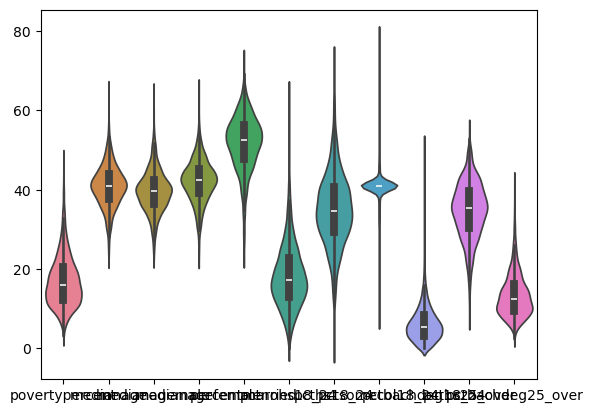

In [37]:
columns = ['povertypercent', 'medianage', 'medianagemale','medianagefemale', 'percentmarried', 'pctnohs18_24', 'pcths18_24', 'pctsomecol18_24', 'pctbachdeg18_24', 'pcths25_over', 'pctbachdeg25_over']
sns.violinplot(df2.loc[:, columns])
plt.show()

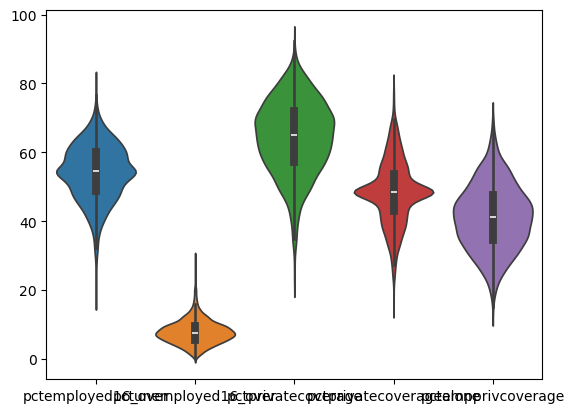

In [38]:
columns2 = ['pctemployed16_over', 'pctunemployed16_over', 'pctprivatecoverage', 'pctprivatecoveragealone', 'pctempprivcoverage'] 
sns.violinplot(df2.loc[:, columns2])
plt.show()

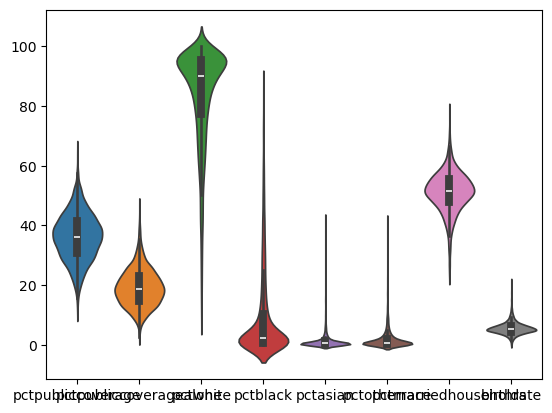

In [39]:
columns3 = ['pctpubliccoverage', 'pctpubliccoveragealone', 'pctwhite', 'pctblack', 'pctasian', 'pctotherrace', 'pctmarriedhouseholds', 'birthrate']
sns.violinplot(df2.loc[:, columns3])
plt.show()

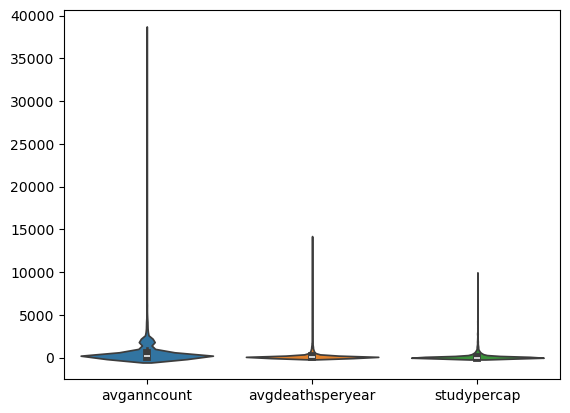

In [40]:
columns = ['avganncount', 'avgdeathsperyear', 'studypercap'] 
sns.violinplot(df2.loc[:, columns])
plt.show()

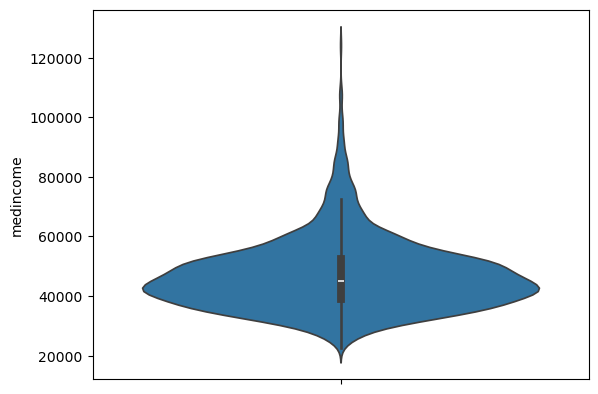

In [41]:
sns.violinplot(df2['medincome'])
plt.show()

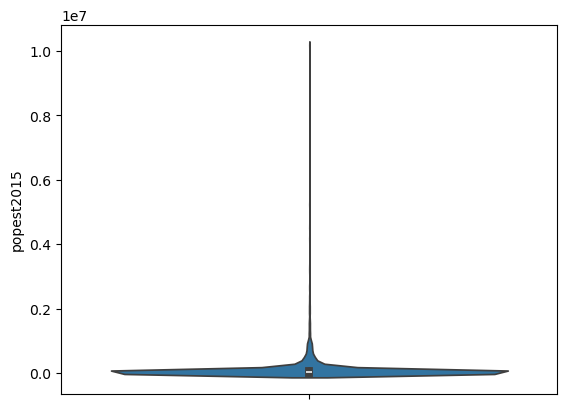

In [42]:
sns.violinplot(df2['popest2015'])
plt.show()

We can see from the violin plots that most of our data is centered around the mean and inner quartiles. 

Lets plot a heat map of our data and find correlation between the data set and how it relates to target death rates.

In [43]:
df2.isin([61494.5, 125635]).any()

avganncount                False
avgdeathsperyear           False
target_deathrate           False
incidencerate              False
medincome                   True
popest2015                 False
povertypercent             False
studypercap                False
binnedinc                  False
medianage                  False
medianagemale              False
medianagefemale            False
geography                  False
percentmarried             False
pctnohs18_24               False
pcths18_24                 False
pctsomecol18_24            False
pctbachdeg18_24            False
pcths25_over               False
pctbachdeg25_over          False
pctemployed16_over         False
pctunemployed16_over       False
pctprivatecoverage         False
pctprivatecoveragealone    False
pctempprivcoverage         False
pctpubliccoverage          False
pctpubliccoveragealone     False
pctwhite                   False
pctblack                   False
pctasian                   False
pctotherra

In [44]:
df2[df2['medincome'] == 125635]

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,medianagefemale,geography,percentmarried,pctnohs18_24,pcths18_24,pctsomecol18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
259,55.0,16,137.6,447.7,125635,13892,3.2,0.0,"(61494.5, 125635]",37.7,37.1,38.6,"Falls Church city, Virginia",55.3,4.1,17.5,40.98,37.5,7.5,34.4,72.0,4.2,92.3,78.2,70.7,13.5,2.7,77.637511,2.12654,11.429216,3.554253,53.27139,3.066181


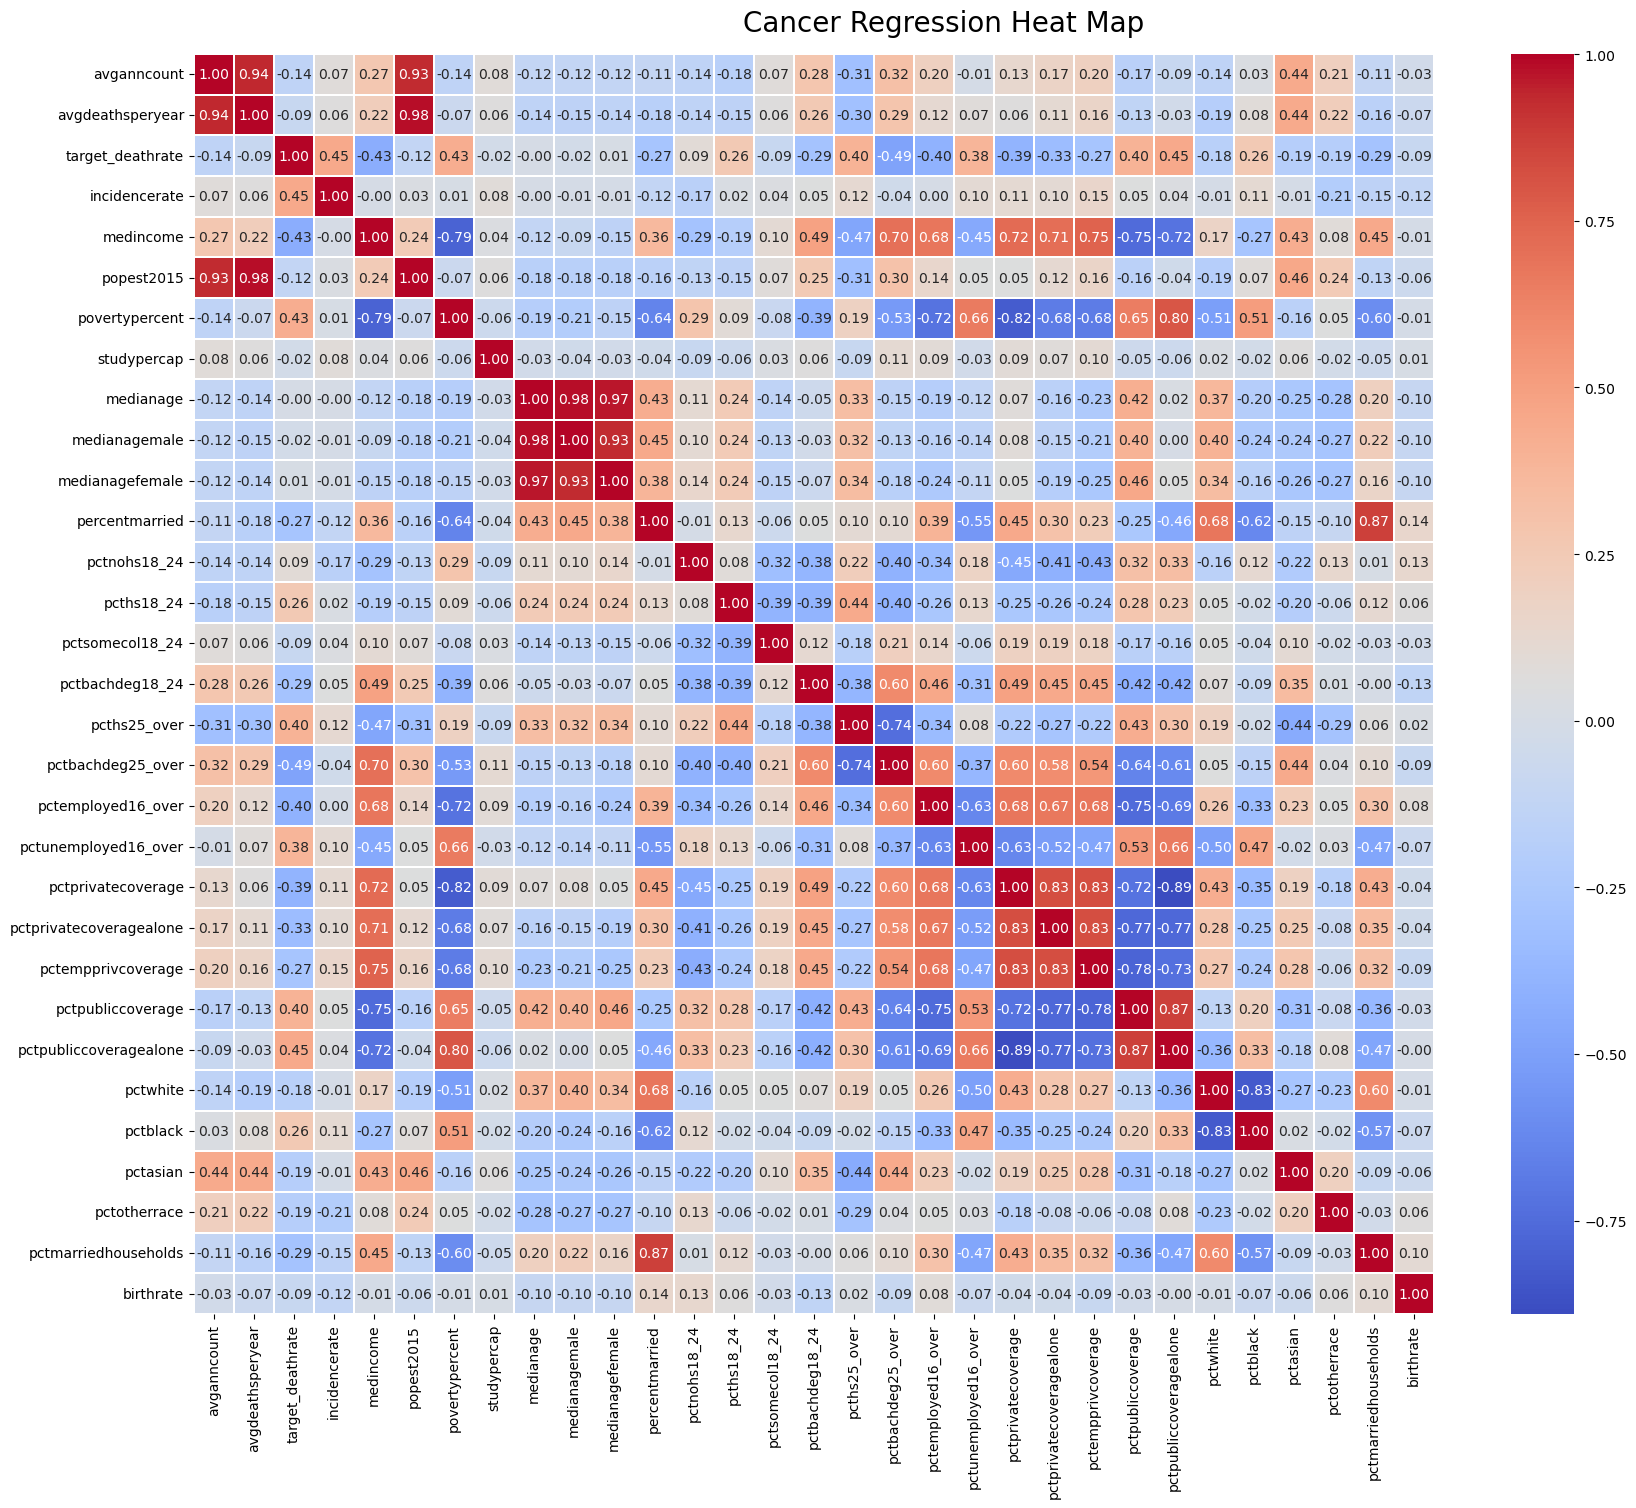

In [45]:
correlation_matrix = df2.drop(['geography', 'binnedinc'], axis=1).corr()
f, ax = plt.subplots(figsize=(20, 15))
hm = sns.heatmap(round(correlation_matrix, 2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.25)
f.subplots_adjust(top=0.95)
t= f.suptitle('Cancer Regression Heat Map', fontsize=20)

Our dependent variable for this data set is target_deathrate. We can see from the heat map that there is some correlation between target_deathrate and other variables. In the next steps, we'll see how their linear relationship is shown being plotted together.

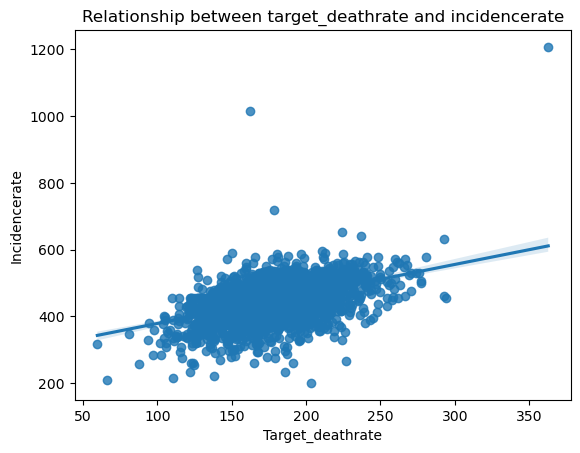

In [46]:
sns.regplot(x='target_deathrate', y= 'incidencerate', data = df2)
plt.title('Relationship between target_deathrate and incidencerate')
plt.xlabel('Target_deathrate')
plt.ylabel('Incidencerate')
plt.show()

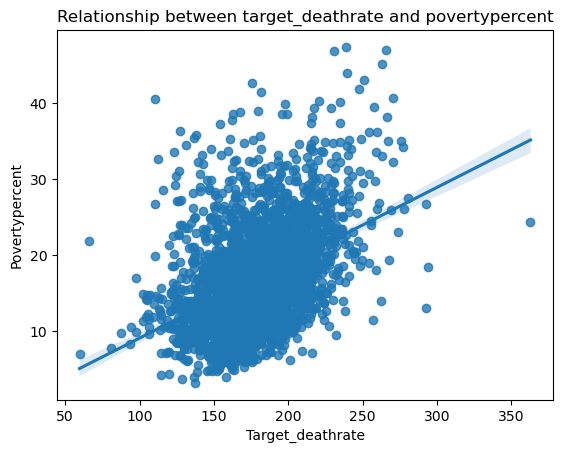

In [47]:
sns.regplot(x='target_deathrate', y= 'povertypercent', data = df2)
plt.title('Relationship between target_deathrate and povertypercent')
plt.xlabel('Target_deathrate')
plt.ylabel('Povertypercent')
plt.show()

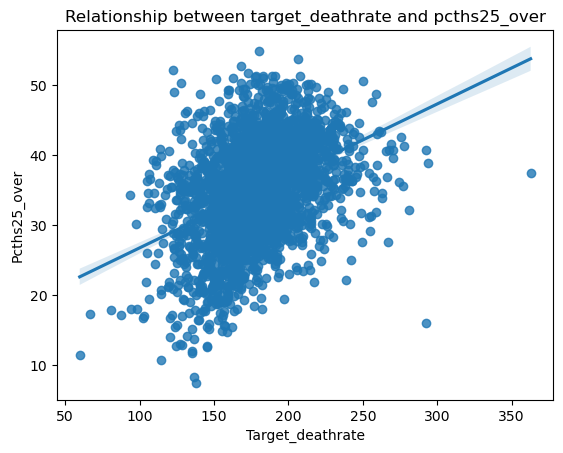

In [48]:
sns.regplot(x='target_deathrate', y= 'pcths25_over', data = df2)
plt.title('Relationship between target_deathrate and pcths25_over')
plt.xlabel('Target_deathrate')
plt.ylabel('Pcths25_over')
plt.show()

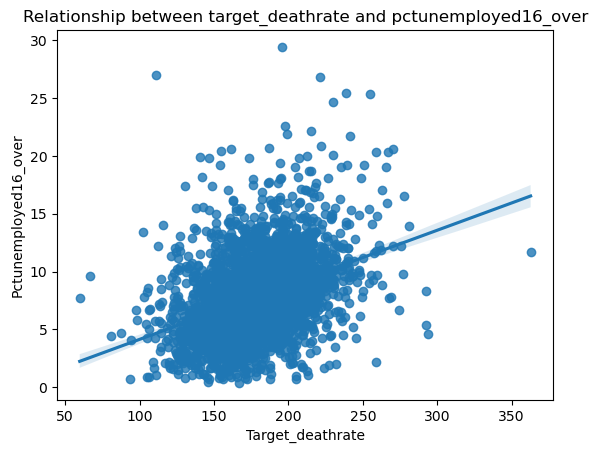

In [49]:
sns.regplot(x='target_deathrate', y= 'pctunemployed16_over', data = df2)
plt.title('Relationship between target_deathrate and pctunemployed16_over')
plt.xlabel('Target_deathrate')
plt.ylabel('Pctunemployed16_over')
plt.show()

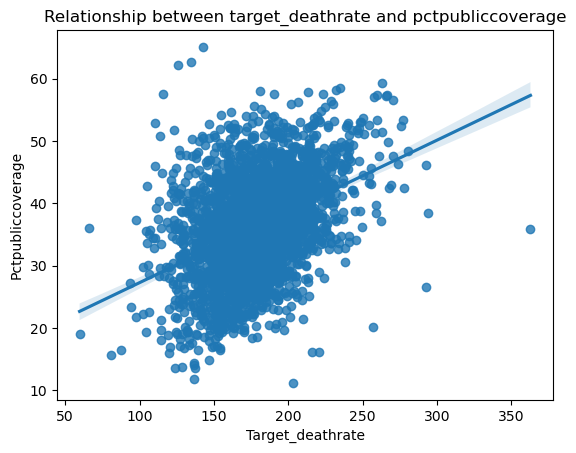

In [50]:
sns.regplot(x='target_deathrate', y= 'pctpubliccoverage', data = df2)
plt.title('Relationship between target_deathrate and pctpubliccoverage')
plt.xlabel('Target_deathrate')
plt.ylabel('Pctpubliccoverage')
plt.show()

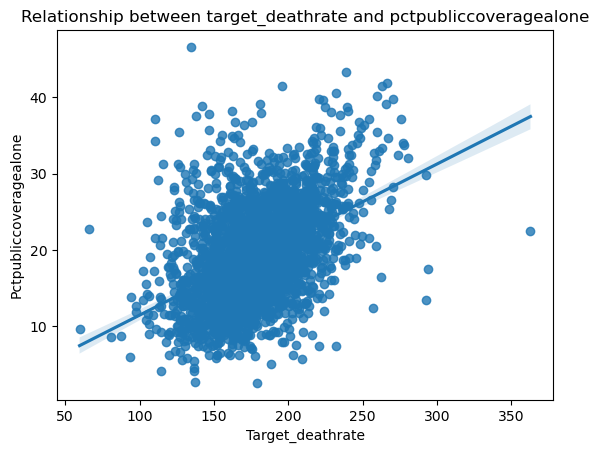

In [51]:
sns.regplot(x='target_deathrate', y= 'pctpubliccoveragealone', data = df2)
plt.title('Relationship between target_deathrate and pctpubliccoveragealone')
plt.xlabel('Target_deathrate')
plt.ylabel('Pctpubliccoveragealone')
plt.show()

Ho: Target_death rate is not related to incidencerate, povertypercent, pcths25_over, pctunemployed16_over, pctpubliccoverage, and pctpubliccoveragealone.

Ha: Target_death rate is related to incidencerate, povertypercent, pcths25_over, pctunemployed16_over, and pctpubliccoverage, and pctpubliccoveragealone.

In [100]:
X1 = df2.drop(['target_deathrate', 'geography', 'binnedinc'], axis = 1)
y = df2['target_deathrate']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.25, random_state = 42)

In [102]:
lnr = LinearRegression()

In [103]:
lnr.fit(X_train, y_train)

LinearRegression()

In [104]:
lnr.score(X_train, y_train)

0.5310961513469453

In [57]:
y_pred = lnr.predict(X_test)
print('The Mean Squared Error: ' , mean_squared_error(y_test, y_pred))
print('The Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('The Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))

The Mean Squared Error:  413.5288105577473
The Mean Absolute Error:  15.16116274437459
The Root Mean Squared Error:  20.33540780406794


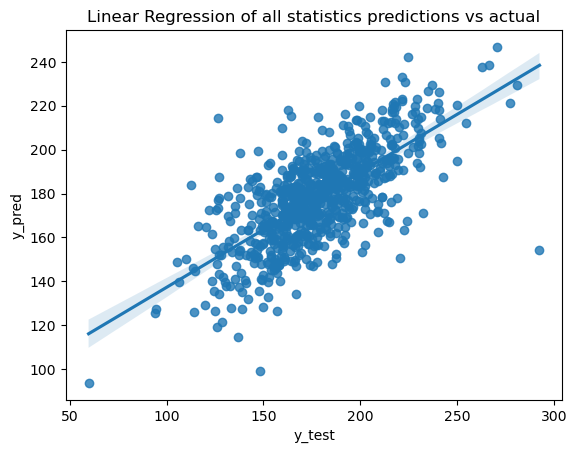

In [58]:
sns.regplot(x=y_test, y=y_pred)
plt.title('Linear Regression of all statistics predictions vs actual')

plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [59]:
columns = ['incidencerate', 'povertypercent', 'pcths25_over', 'pctunemployed16_over', 'pctpubliccoverage', 'pctpubliccoveragealone']
X = df2.loc[:, columns]
y = df2['target_deathrate']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [61]:
lnr = LinearRegression()

In [62]:
lnr.fit(X_train, y_train)

LinearRegression()

In [63]:
lnr.score(X_train, y_train)

0.472660323209279

In [64]:
y_pred1 = lnr.predict(X_test)
print('The Mean Squared Error: ' , mean_squared_error(y_test, y_pred))
print('The Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('The Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))

The Mean Squared Error:  413.5288105577473
The Mean Absolute Error:  15.16116274437459
The Root Mean Squared Error:  20.33540780406794


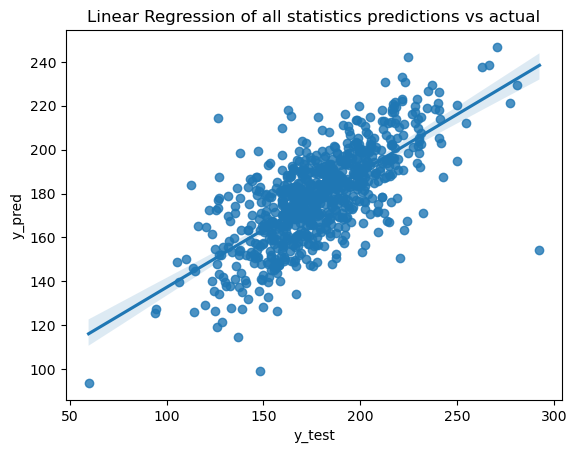

In [65]:
sns.regplot(x=y_test, y=y_pred)
plt.title('Linear Regression of all statistics predictions vs actual')

plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [66]:
columns = ['incidencerate', 'povertypercent', 'pcths25_over', 'pctunemployed16_over', 'pctpubliccoverage', 'pctpubliccoveragealone']
X1 = df2.loc[:, columns]
X = sm.add_constant(X1)
y = df2['target_deathrate']

In [67]:
ols = sm.OLS(y_train, X_train)

In [68]:
ols2 = ols.fit()

In [69]:
ols2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       target_deathrate   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          3.031e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):                        0.00
Time:                        16:14:10   Log-Likelihood:                         -10102.
No. Observations:                2285   AIC:                                  2.022e+04
Df Residuals:                    2279   BIC:                                  2.025e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
incidencerate              0.2339      0.005     48.606      0.000       0.224       0.243
povertypercent             0.9066      0.114      7.980      0.000       0.684       1.129
pcths25_over               1.2632      0.066     19.044      0.000       1.133       1.393
pctunemployed16_over       0.5796      0.170      3.408      0.001       0.246       0.913
pctpubliccoverage         -0.2447      0.110     -2.221      0.026      -0.461      -0.029
pctpubliccoveragealone     0.9739      0.178      5.469      0.000       0.625       1.323
==============================================================================
Omnibus:                      127.996   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              482.419
Skew:                           0.109   Prob(JB):                    1.75e-105
Kurtosis:                       5.240   Cond. No.                         226.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From our summary, we can see that the probability f statistic is close to zero, so we can reject our null hypothesis.

In [70]:
y_pred1 = ols2.predict(X_test)
print('The Mean Squared Error: ' , mean_squared_error(y_test, y_pred1))
print('The Mean Absolute Error: ', mean_absolute_error(y_test, y_pred1))
print('The Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred1)))

The Mean Squared Error:  427.11983506486536
The Mean Absolute Error:  15.565559416629496
The Root Mean Squared Error:  20.66687772898619


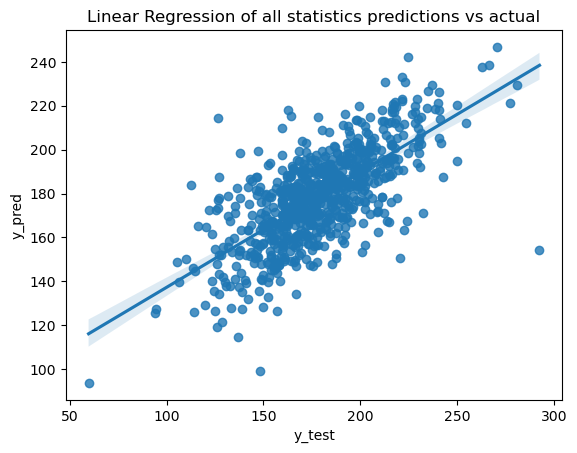

In [71]:
sns.regplot(x=y_test, y=y_pred)
plt.title('Linear Regression of all statistics predictions vs actual')

plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [72]:
columns = ['incidencerate', 'povertypercent', 'pcths25_over', 'pctunemployed16_over', 'pctpubliccoverage', 'pctpubliccoveragealone']
X = df2.loc[:, columns]
y = df2['target_deathrate']

In [73]:
dtree = RandomForestRegressor(n_estimators = 1000)

In [74]:
dtree.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000)

In [75]:
y_pred2 = dtree.predict(X_test)

In [76]:
r2_score(y_test, y_pred2)

0.4897156888286054

In [77]:
print('The Mean Squared Error: ' , mean_squared_error(y_test, y_pred2))
print('The Mean Absolute Error: ', mean_absolute_error(y_test, y_pred2))
print('The Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred2)))

The Mean Squared Error:  410.2728468735313
The Mean Absolute Error:  15.073686745406839
The Root Mean Squared Error:  20.255193084084173


In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
dtree2 = RandomForestRegressor()
param_grid = {"max_depth" : [1, 5, 10, 50], "min_samples_split" : [2, 4, 10,12,16], "max_leaf_nodes": [10, 50, 100,400,700,1000], 'random_state' : [1, 10, 100, 1000, 2000]}
gs = GridSearchCV(estimator=dtree2, param_grid=param_grid)
gs = gs.fit(X_train, y_train)
print(gs.best_estimator_) 
print(gs.best_score_)

RandomForestRegressor(max_depth=50, max_leaf_nodes=50, min_samples_split=16,
                      random_state=2000)
0.47235651720011446


In [81]:
dtree3 = RandomForestRegressor(max_depth = 50, max_leaf_nodes = 50, min_samples_split = 16, random_state = 2000)
dtree3.fit(X_train, y_train)
y_predict3 = dtree.predict(X_test)
r2_score(y_test, y_predict3)

0.4897156888286054

In [82]:
print('The Mean Squared Error: ' , mean_squared_error(y_test, y_predict3))
print('The Mean Absolute Error: ', mean_absolute_error(y_test, y_predict3))
print('The Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_predict3)))

The Mean Squared Error:  410.2728468735313
The Mean Absolute Error:  15.073686745406839
The Root Mean Squared Error:  20.255193084084173


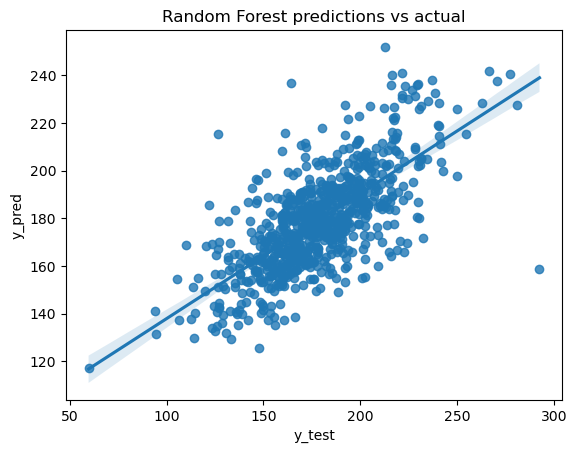

In [85]:
sns.regplot(x=y_test, y=y_predict3)
plt.show
plt.title('Random Forest predictions vs actual')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

30


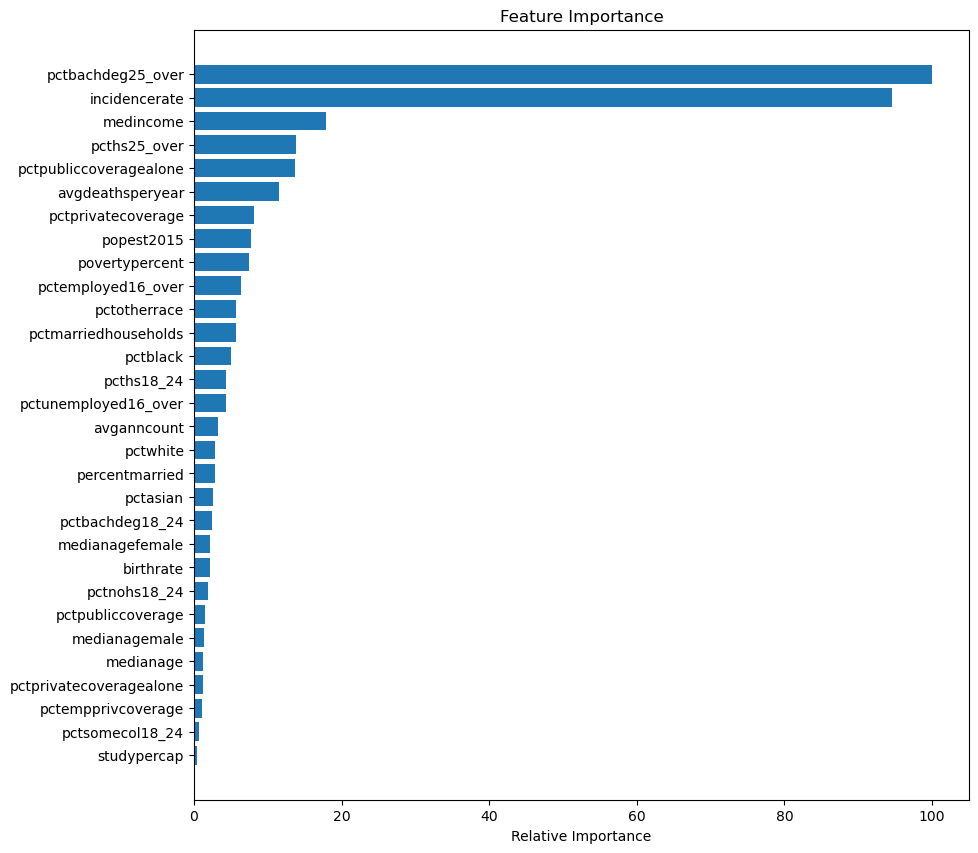

In [106]:
clf = RandomForestRegressor(max_depth = 50, max_leaf_nodes = 50, min_samples_split = 16, random_state = 2000)
clf.fit(X_train, y_train)
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X1.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Feature Importance')
plt.show()

Our best-performing model was a random forest, which makes sense since it can reduce overfitting. With an RMSE of 20.25, we were not far off from predicting the actual target death rate, but our R2 had a value of 0.49, which means that only 49% of the variability in the dependent variable is explained by the independent variable. I honestly feel that there was not much insight to gain within this analysis due to the low correlation between the dependent variable and the independent variable.